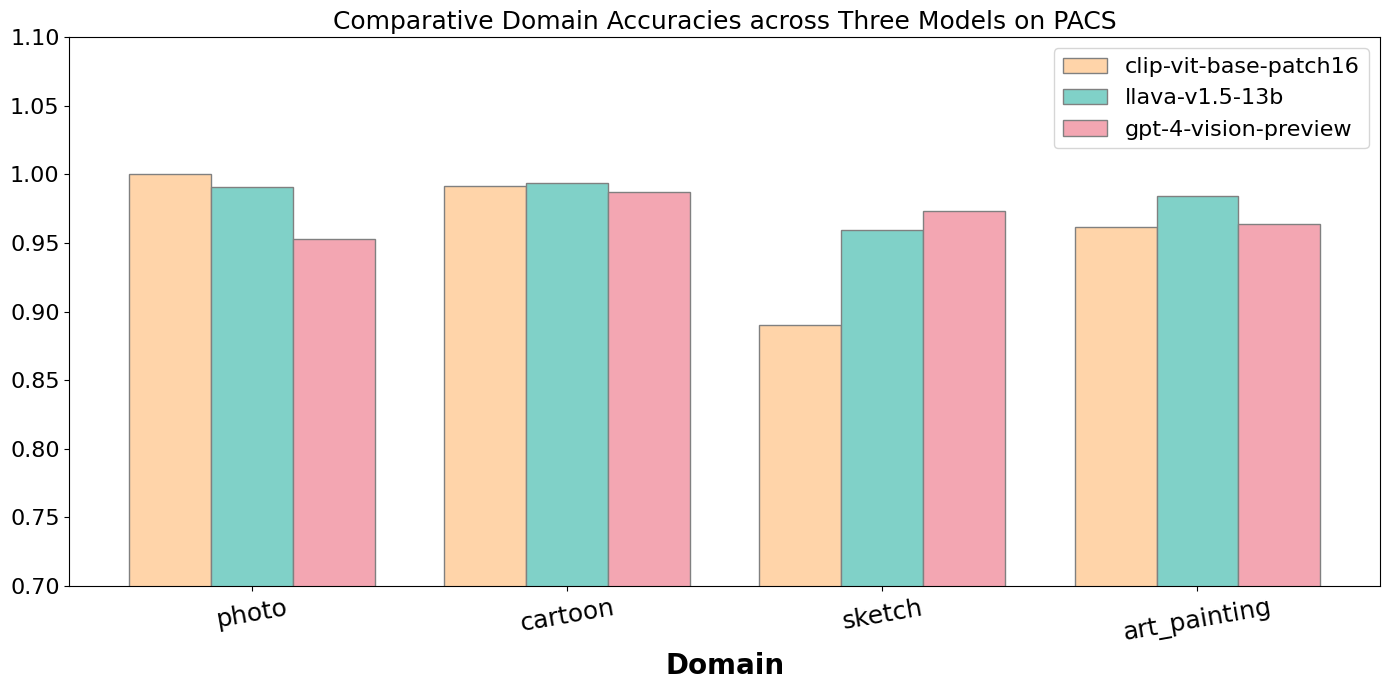

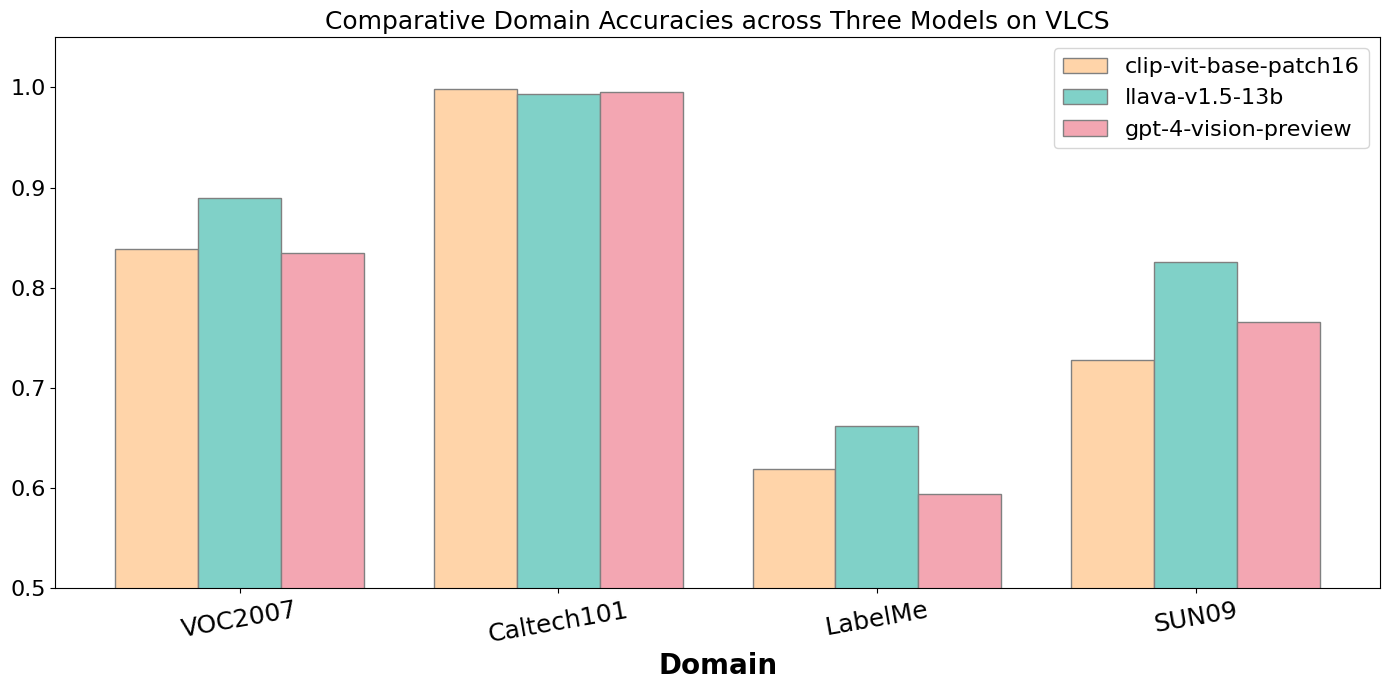

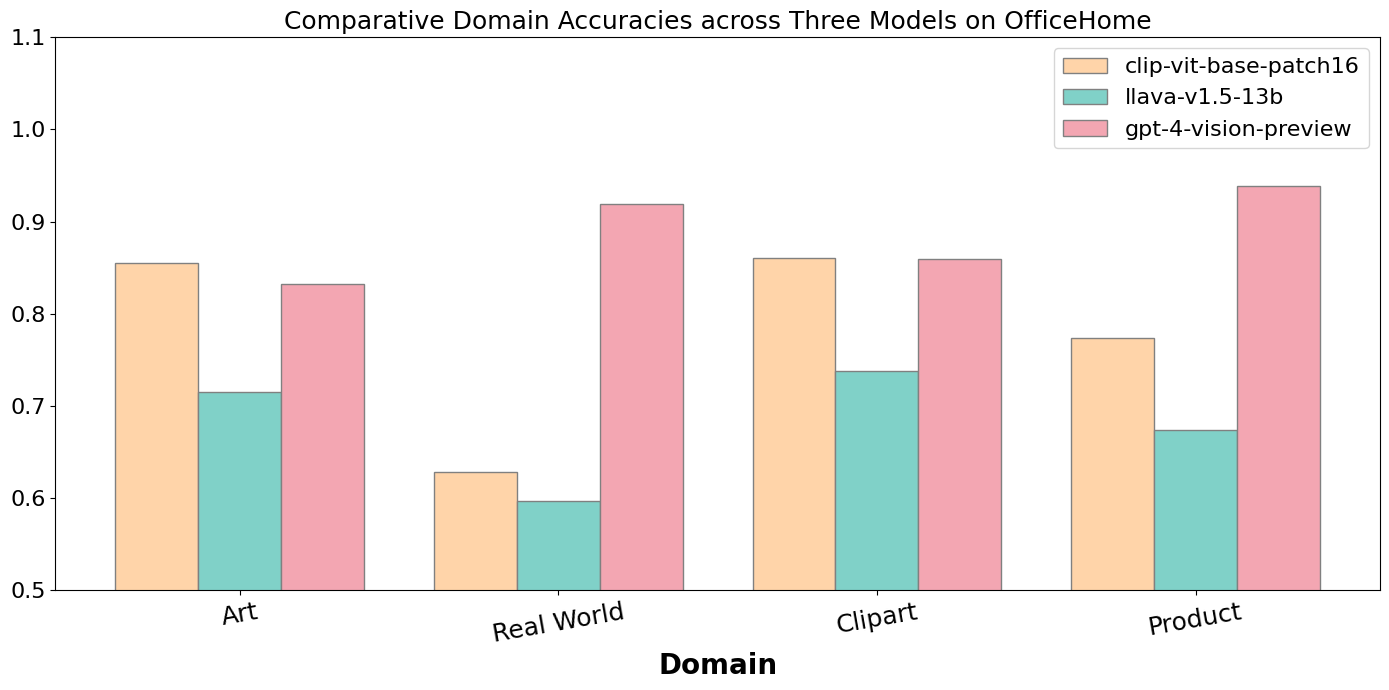

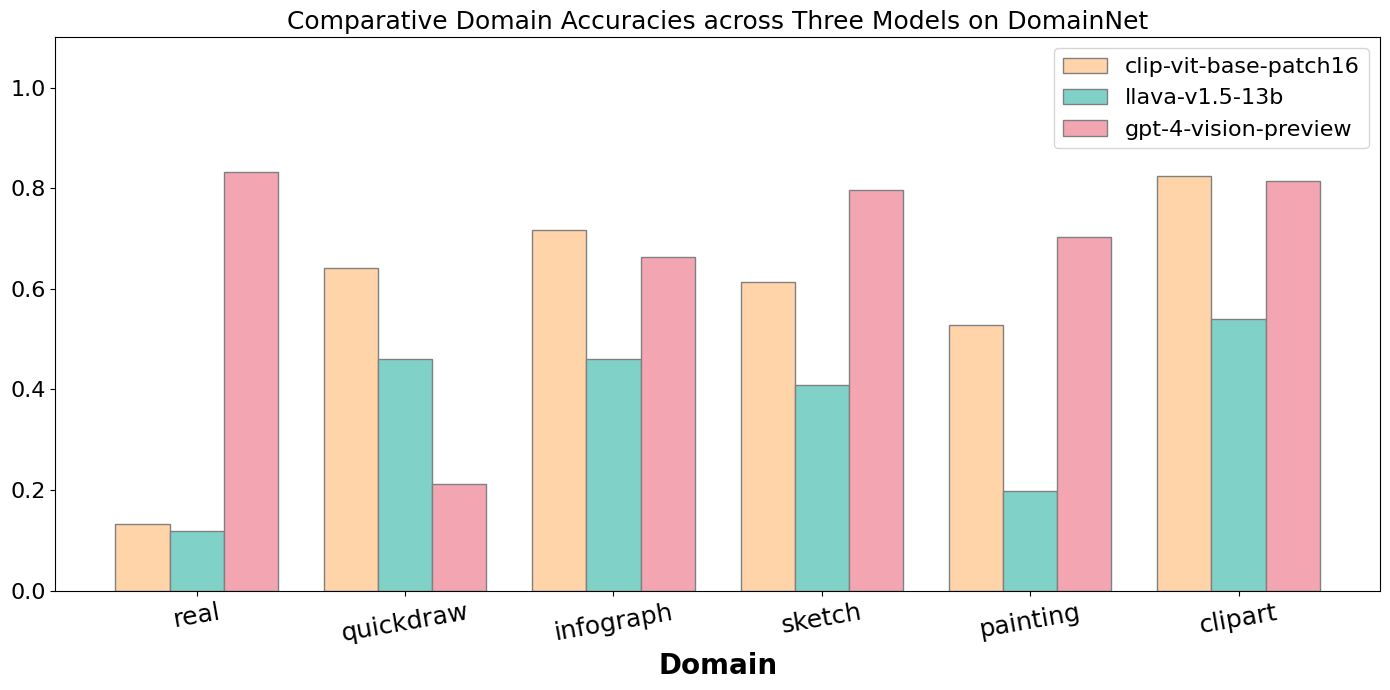

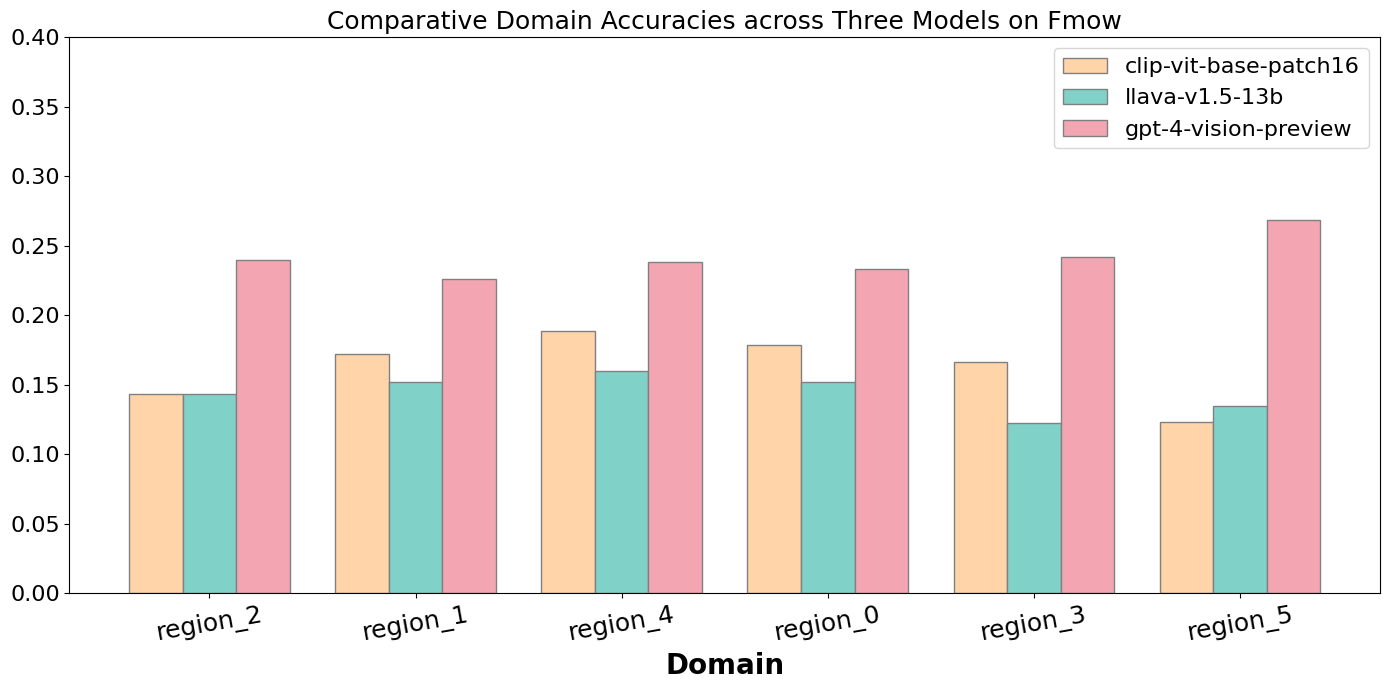

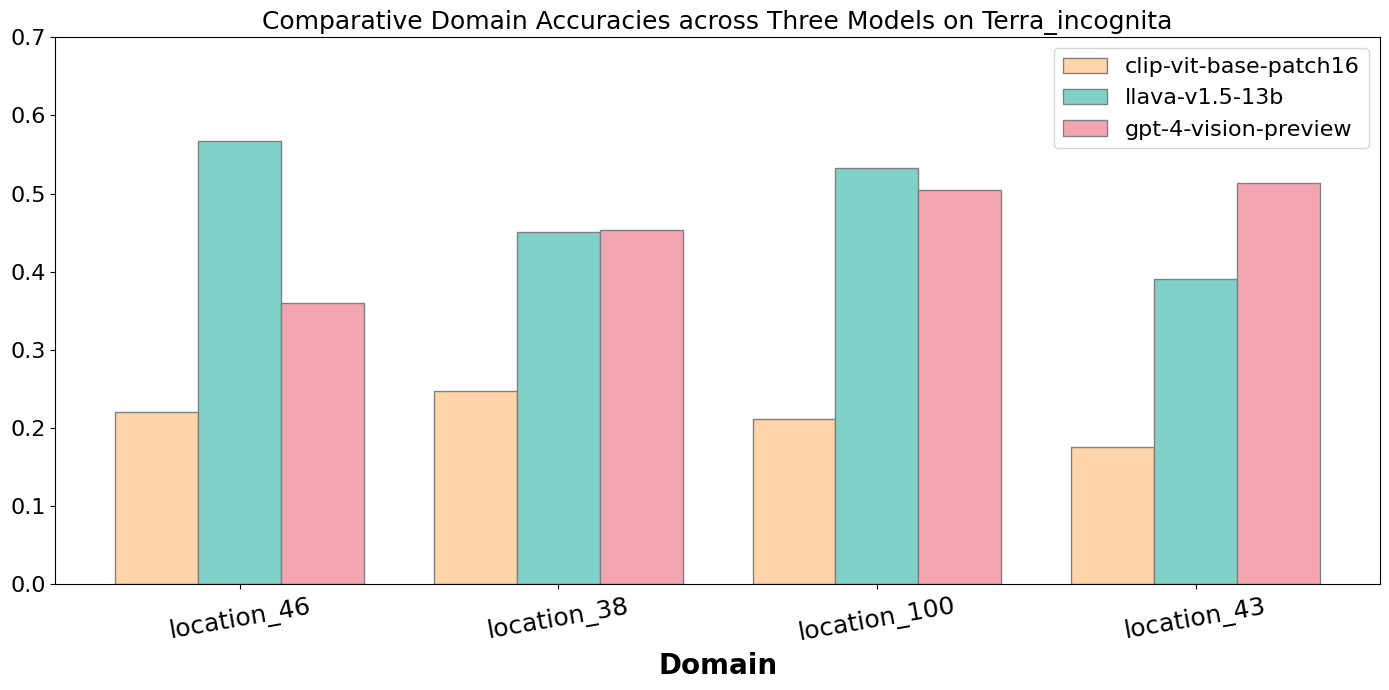

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import json

json_file_paths = {
    'PACS': '../exp_output/2023-12-07-06_51_36',
    'VLCS': '../exp_output/2023-12-06-20_27_30',
    'office_home': '../exp_output/2023-12-07-01_30_24',
    'domain_net': '../exp_output/2023-12-07-12_33_36',
    'fmow_v1.1_processed': '../exp_output/2023-12-08-02_21_16',
    'terra_incognita': '../exp_output/2023-12-06-20_27_33'
}

for dataset, json_file_path in json_file_paths.items():
    # Reading the data back from the file
    with open(json_file_path+'/results_clip-vit-base-patch16_random.json', 'r') as json_file:
        data_clip = json.load(json_file)
    with open(json_file_path+'/results_llava-v1.5-13b_random.json', 'r') as json_file:
        data_llava = json.load(json_file)
    with open(json_file_path+'/results_gpt-4-vision-preview_random.json', 'r') as json_file:
        data_gpt = json.load(json_file)

    # Assuming 'domains' is a dictionary containing the domain data
    domains = data_clip['datasets'][dataset]['domains']
    domain_names = list(domains.keys())
    domain_accuracies_clip = [domains[domain]['accuracy']
                              for domain in domain_names]
    # Assuming 'domains' is a dictionary containing the domain data
    domains = data_llava['datasets'][dataset]['domains']
    domain_names = list(domains.keys())
    domain_accuracies_llava = [domains[domain]['accuracy']
                               for domain in domain_names]
    # Assuming 'domains' is a dictionary containing the domain data
    domains = data_gpt['datasets'][dataset]['domains']
    domain_names = list(domains.keys())
    domain_accuracies_gpt = [domains[domain]['accuracy']
                             for domain in domain_names]

    # Plotting the accuracies for each domain for all models
    plt.figure(figsize=(14, 7))

    # Width of a bar
    bar_width = 0.26

    # Setting position of bar on X axis
    r1 = np.arange(len(domain_accuracies_clip))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    # colors = ['#007acc', '#d9534f', '#f0ad4e']
    # colors = ['#76c7a1', '#b8d18c', '#ffa270']
    # colors = ['#80D1C8', '#FFD4A9', '#7BCAFB']
    colors = ['#FFD4A9', '#80D1C8',  '#F3A6B2']
    # Make the plot
    plt.bar(r1, domain_accuracies_clip, color=colors[0],
            width=bar_width, edgecolor='grey', label='clip-vit-base-patch16')
    plt.bar(r2, domain_accuracies_llava, color=colors[1],
            width=bar_width, edgecolor='grey', label='llava-v1.5-13b')
    plt.bar(r3, domain_accuracies_gpt, color=colors[2],
            width=bar_width, edgecolor='grey', label='gpt-4-vision-preview')

    # Add xticks on the middle of the group bars
    plt.xlabel('Domain', fontweight='bold', fontsize=20)
    plt.xticks(
        [r + bar_width for r in range(len(domain_accuracies_clip))], domain_names, fontsize=18, rotation=10)
    plt.yticks(fontsize=16)
    # Set the y-axis to start from 0.6 to highlight differences
    if dataset == 'PACS':
        plt.ylim(0.7, 1.1)
    elif dataset == 'VLCS':
        plt.ylim(0.5, 1.05)
    elif dataset == 'office_home':
        plt.ylim(0.5, 1.1)
        dataset = 'OfficeHome'
    elif dataset == 'domain_net':
        dataset = 'DomainNet'
        plt.ylim(0.0, 1.1)
    elif dataset == 'fmow_v1.1_processed':
        dataset = 'Fmow'
        plt.ylim(0, 0.4)
    elif dataset == 'terra_incognita':
        dataset = 'Terra_incognita'
        plt.ylim(0, 0.7)
    # Create legend & title
    plt.legend(fontsize=16, loc='upper right')
    plt.title(
        f'Comparative Domain Accuracies across Three Models on {dataset}', fontsize=18)
    plt.tight_layout()

    # Save the figure
    plt_path = f'./comparative_domain_accuracies_{dataset}.pdf'
    plt.savefig(plt_path)

    # Show plot
    plt.show()